In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
import h5py
from get_flamingo_info import get_flamingo_cosmo

In [2]:
sim_name1 = 'L1000N0900/HYDRO_FIDUCIAL'
sim_name2 = 'L1000N1800/HYDRO_FIDUCIAL'
sim_name3 = 'L1000N3600/HYDRO_FIDUCIAL'
sim_name4 = 'L1000N3600/DMO_FIDUCIAL'
sim_name_list = [sim_name1, sim_name2, sim_name3]

In [3]:
xlabel = r'$\log_{10} M ~[h^{-1}{\rm M}_\odot]$'
ylabel = r'${\rm d}n/{\rm d}\ln M ~ [h^3 {\rm Mpc}^{-3}]$'

## calculate analytic first 

In [4]:
halofinder = 'HBT'
mdef = 'vir'

cosmo = get_flamingo_cosmo(sim_name1) # same cosmo
H0 = cosmo['h'] * 100
Om0 = 1-cosmo['Omega_lambda']
Ob0 = cosmo['Omega_b']

#### analytic from colossus ###
from colossus.cosmology import cosmology
flamingo_params = {'flat': True, 'H0': H0, 'Om0': Om0, 'Ob0': Ob0,
                   'sigma8': 0.812, 'ns': 0.966}
cosmology.addCosmology('flamingo', flamingo_params)
cosmo_col = cosmology.setCosmology('flamingo')
from colossus.lss import mass_function
redshift = 0.3

output_loc = f'/cosma8/data/do012/dc-wu5/cylinder/output_{sim_name1}/stats/'
M_flamingo, dndlnM_flamingo = np.loadtxt(output_loc+f'HMF_{halofinder}_{mdef}.dat', unpack=True)

mfunc_vir_tinker = mass_function.massFunction(M_flamingo, redshift, q_out='dndlnM',
    mdef = 'vir', model = 'tinker08')

mfunc_vir_seppi = mass_function.massFunction(M_flamingo, redshift, q_out='dndlnM',
    mdef = 'vir', model = 'seppi20')

#print(len(M_flamingo), len(mfunc_vir_tinker))

## Compare resolution

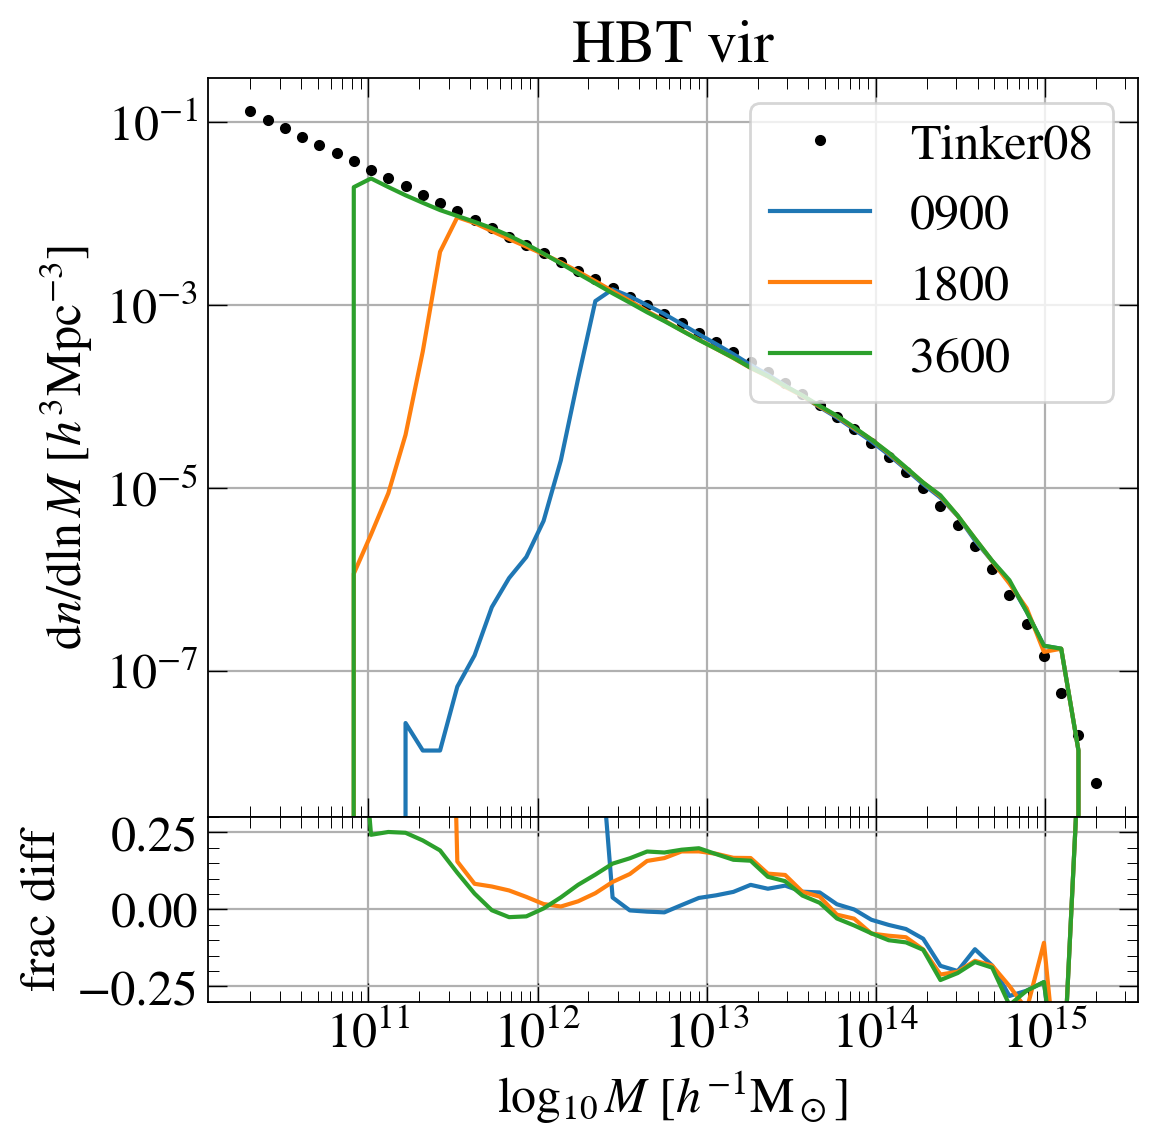

In [5]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[4,1], wspace=0, hspace=0)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)

ax1.plot(M_flamingo, mfunc_vir_tinker, '.', label='Tinker08', c='k')
#ax1.plot(M_flamingo, mfunc_vir_seppi, '.', label='Seppi20')

for sim_name in sim_name_list:
    label = sim_name[6:10]
    output_loc = f'/cosma8/data/do012/dc-wu5/cylinder/output_{sim_name}/stats/'
    M_flamingo, dndlnM_flamingo = np.loadtxt(output_loc+f'HMF_{halofinder}_{mdef}.dat', unpack=True)
    line = ax1.plot(M_flamingo, dndlnM_flamingo, label=label)

    #ax1.plot(np.exp(x_data), y_data, '.', c='k', label='Flamingo')
    #print(len(mfunc_vir_tinker), len(dndlnM_flamingo), len(M_flamingo))

    sel = (dndlnM_flamingo > 0)
    tinker_over_flamingo = mfunc_vir_tinker[sel]  / dndlnM_flamingo[sel]  - 1
    ax2.plot(M_flamingo[sel], tinker_over_flamingo, label=label, c=line[0].get_c())

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(ylabel);
ax1.legend(loc=1)
ax1.set_title(f'{halofinder} {mdef}')

plt.setp(ax1.get_xticklabels(), visible=False)

#ax2.plot(M_plot, seppi_over_flamingo, label='Seppi20')
ax2.set_ylim(-0.3, 0.3)
ax2.set_xscale('log')
ax2.set_xlabel(xlabel)
ax2.set_ylabel('frac diff');
plt.savefig('../../plots/stats/HMF_resolution.png')

# Highest res, HYDRO vs DMO, 2 analytic 

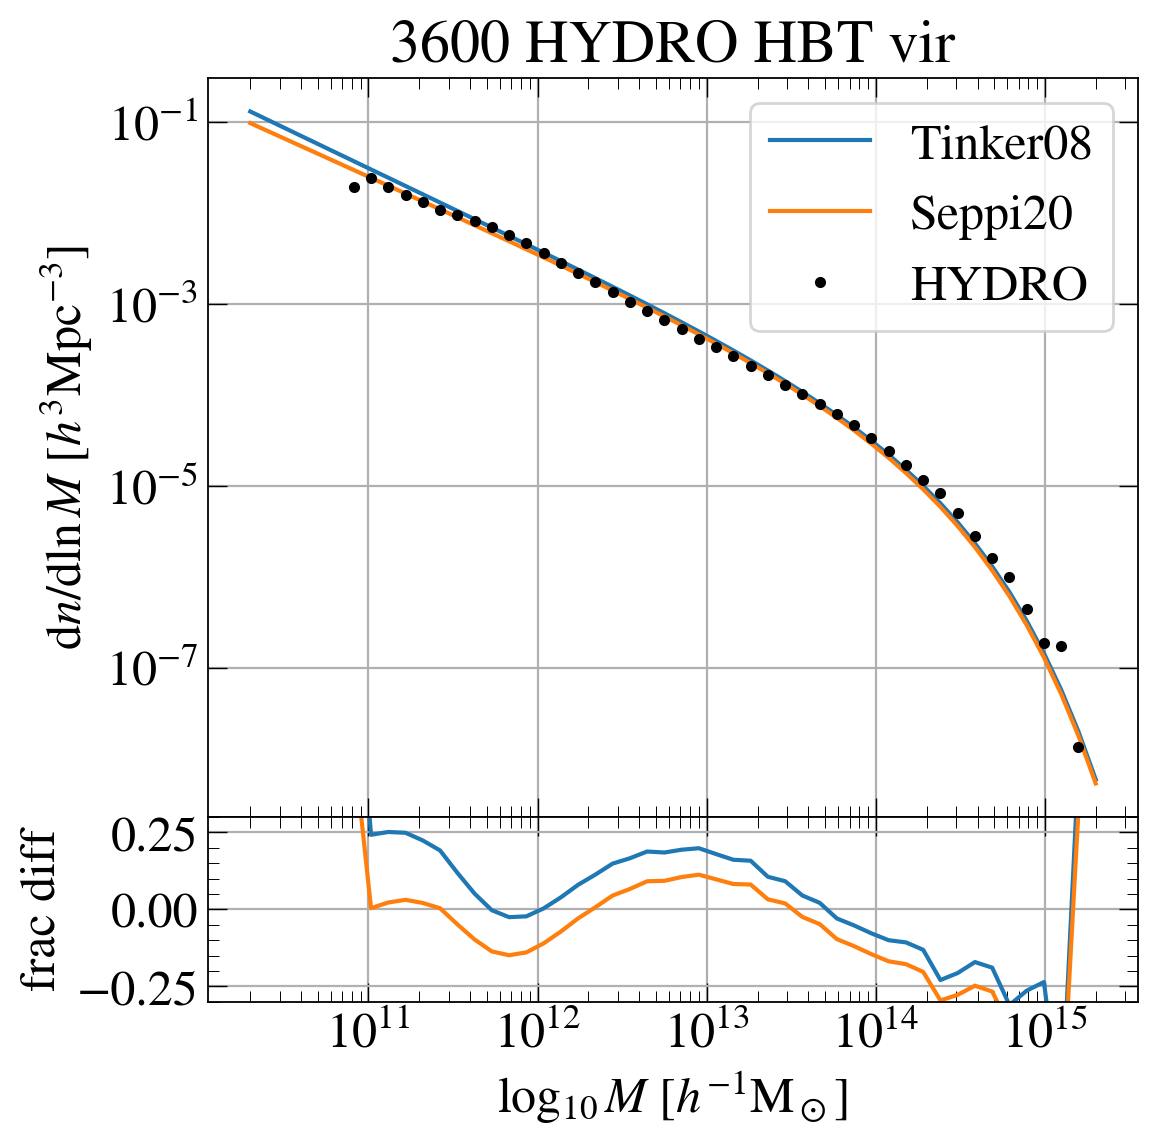

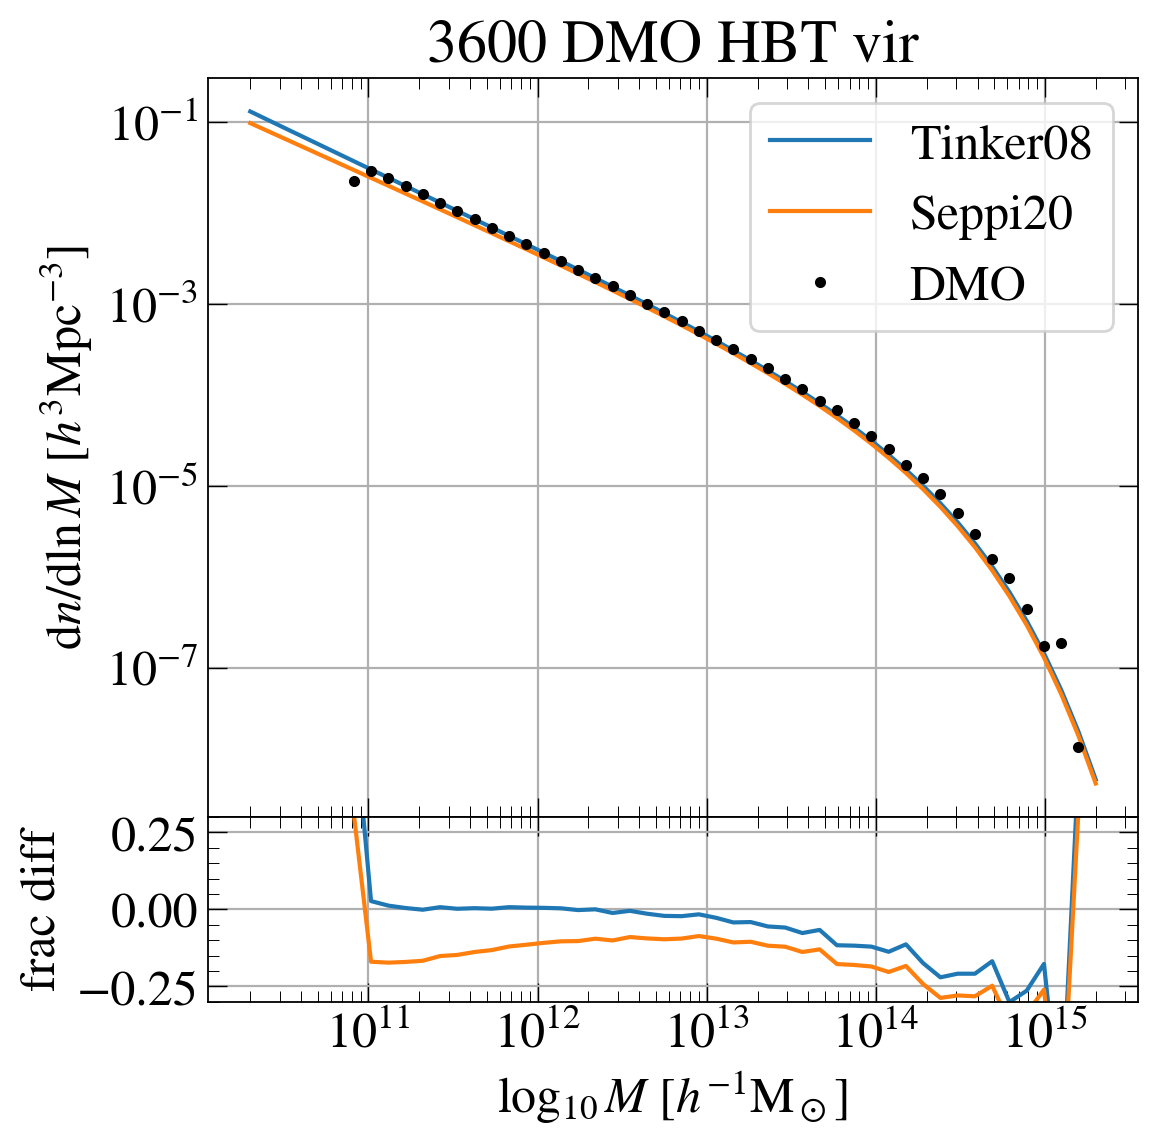

In [6]:
import matplotlib.gridspec as gridspec


for isim, sim_name in enumerate([sim_name3, sim_name4]):
    fig = plt.figure()
    gs = gridspec.GridSpec(2, 1, height_ratios=[4,1], wspace=0, hspace=0)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1], sharex=ax1)
    
    ax1.plot(M_flamingo, mfunc_vir_tinker, label='Tinker08')
    ax1.plot(M_flamingo, mfunc_vir_seppi, label='Seppi20')    #sim_name = 'L1000N3600/HYDRO_FIDUCIAL'
    
    label = sim_name[11:-9]
    output_loc = f'/cosma8/data/do012/dc-wu5/cylinder/output_{sim_name}/stats/'
    M_flamingo, dndlnM_flamingo = np.loadtxt(output_loc+f'HMF_{halofinder}_{mdef}.dat', unpack=True)
    line = ax1.plot(M_flamingo, dndlnM_flamingo, '.', c='k', label=label)
    
    sel = (dndlnM_flamingo > 0)
    tinker_over_flamingo = mfunc_vir_tinker[sel]  / dndlnM_flamingo[sel]  - 1
    seppi_over_flamingo = mfunc_vir_seppi[sel]  / dndlnM_flamingo[sel]  - 1
    ax2.plot(M_flamingo[sel], tinker_over_flamingo, label='Tinker08')
    ax2.plot(M_flamingo[sel], seppi_over_flamingo, label='Seppi20')
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_ylabel(ylabel);
    ax1.legend(loc=1)
    ax1.set_title(f'{sim_name[6:10]} {label} {halofinder} {mdef}')
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2.set_ylim(-0.3, 0.3)
    #ax2.legend()
    ax2.set_xscale('log')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('frac diff');

    plt.savefig(f'../../plots/stats/HMF_{label}_analytic.png')

# compare HBT vs VR

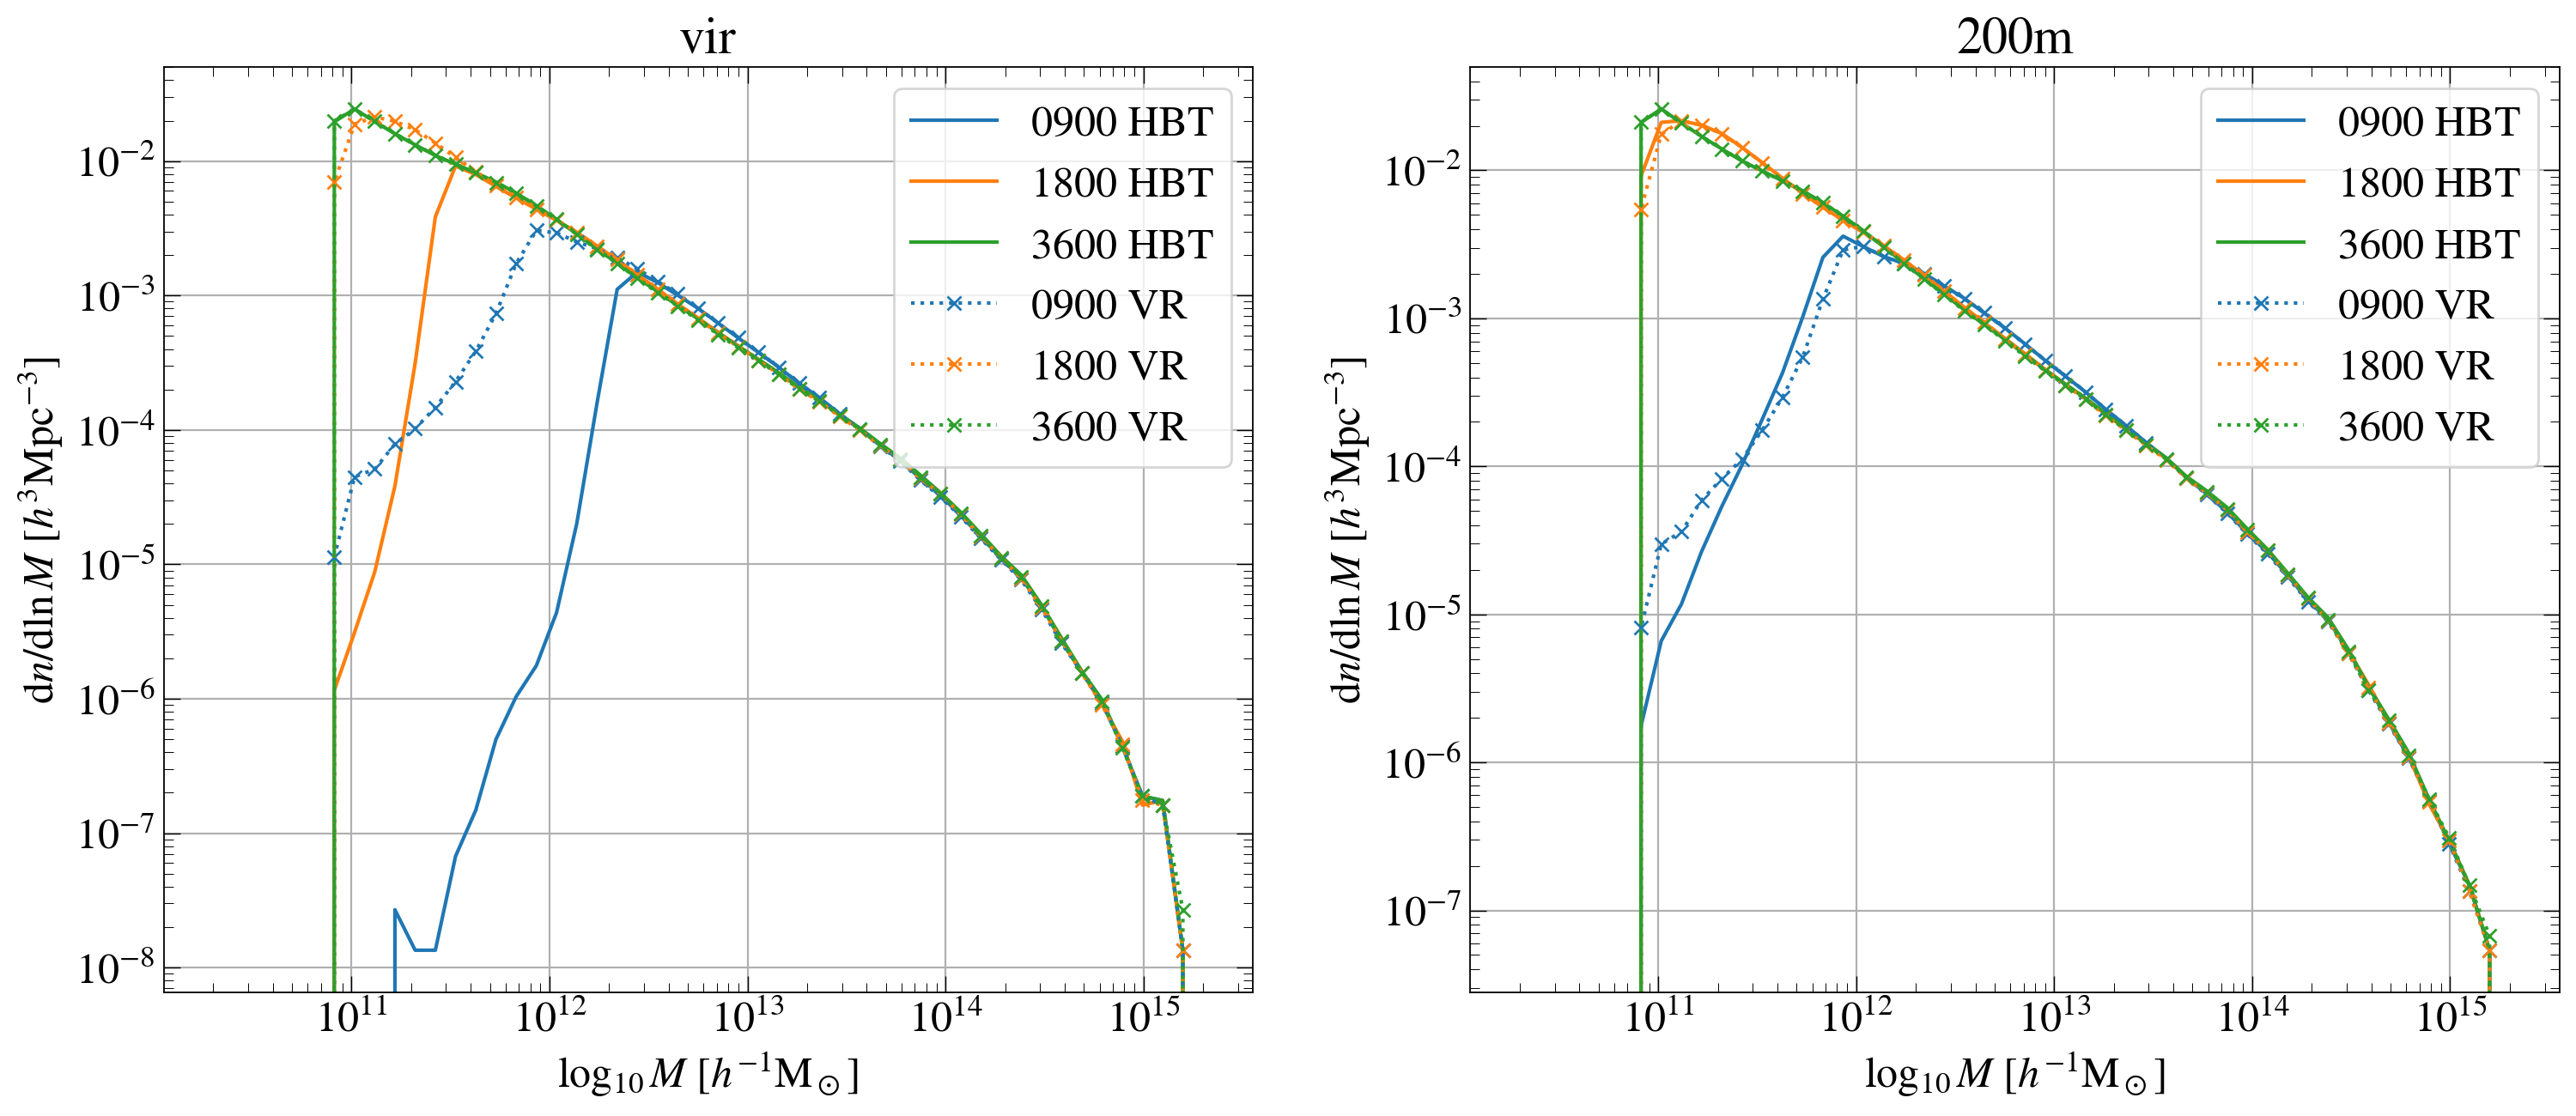

In [7]:
plt.figure(figsize=(18,7))

for i, mdef in enumerate(['vir', '200m']):#for mdef in :
    plt.subplot(1,2,1+i)
    for halofinder in ['HBT', 'VR']:
        if halofinder == 'HBT':
            ls = '-'
            marker=None
        if halofinder == 'VR':
            ls = ':'
            marker = 'x'
        for isim, sim_name in enumerate(sim_name_list):   
            
            label = sim_name[6:10]+' '+halofinder
            output_loc = f'/cosma8/data/do012/dc-wu5/cylinder/output_{sim_name}/stats/'
            M_flamingo, dndlnM_flamingo = np.loadtxt(output_loc+f'HMF_{halofinder}_{mdef}.dat', unpack=True)
            plt.plot(M_flamingo, dndlnM_flamingo, marker=marker, ls=ls, 
                     color=f'C{isim}', label=label)
            plt.loglog()
            plt.title(mdef)
    plt.legend(loc=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plt.savefig('../../plots/stats/HMF_HBT_VR.png')